## Data Preparation

In [1]:
!pip install pennylane qiskit qiskit_machine_learning imblearn plotly seaborn
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap, NLocal
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_machine_learning.kernels import QuantumKernel

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, pairwise_distances, silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.manifold import TSNE

# classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from time import time
from datetime import datetime
import matplotlib.cm as cm
from scipy.spatial.distance import cdist

from datetime import datetime
from joblib import Parallel, delayed

import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import jax;

jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

import optax  # optimization using jax

import pennylane as qml
import pennylane.numpy as pnp

sns.set()

seed = 0
rng = np.random.default_rng(seed=seed)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 67.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 73.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.

In [2]:
X = pd.read_csv("/kaggle/input/logstdvif/x_vif_only.csv")
X.drop(['Unnamed: 0','rev_stop'], axis=1, inplace=True)
y = pd.read_csv("/kaggle/input/logstdvif/y.csv")
df=pd.concat([X,y],axis=1)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

X = pd.read_csv("/kaggle/input/logstdvif/x_vif_only.csv")
X.drop(['Unnamed: 0','rev_stop'], axis=1, inplace=True)
y = pd.read_csv("/kaggle/input/logstdvif/y.csv", index_col=None)['went_on_backorder']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No backorder', round(y.value_counts()[0]/len(y) * 100,2), '% of the dataset')
print('Backorder', round(y.value_counts()[1]/len(y) * 100,2), '% of the dataset')

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No backorder 99.3 % of the dataset
Backorder 0.7 % of the dataset
Train: [ 259572  259620  259654 ... 1775315 1775316 1775317] Test: [     0      1      2 ... 355895 355896 355897]
Train: [      0       1       2 ... 1775315 1775316 1775317] Test: [259572 259620 259654 ... 711229 711230 711231]
Train: [      0       1       2 ... 1775315 1775316 1775317] Test: [ 562975  562992  563216 ... 1066527 1066528 1066529]
Train: [      0       1       2 ... 1775315 1775316 1775317] Test: [ 913555  913679  913781 ... 1549977 1550291 1550807]
Train: [      0       1       2 ... 1549977 1550291 1550807] Test: [1420136 1420137 1420138 ... 1775315 1775316 1775317]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99296253 0.00703747]
[0.99296181 0.00703819]


In [3]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))
print("Before UnderSampling, counts of label '1': {}".format(sum(original_ytrain == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(original_ytrain == 0)))

Length of X (train): 1420255 | Length of y (train): 1420255
Length of X (test): 355063 | Length of y (test): 355063
Before UnderSampling, counts of label '1': 9995
Before UnderSampling, counts of label '0': 1410260 



In [4]:
print("test, counts of label '1': {}".format(sum(original_ytest == 1)))
print("test, counts of label '0': {} \n".format(sum(original_ytest == 0)))

test, counts of label '1': 2499
test, counts of label '0': 352564 



{0:17628,1:125} => 2499/20 and 352564/20

In [5]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, RandomizedSearchCV

sm1 = NearMiss(sampling_strategy={0:500,1:500}) # 500:500
Xsm_train, ysm_train = sm1.fit_resample(original_Xtrain, original_ytrain)
sm2 = NearMiss(sampling_strategy={0:200,1:67}) # 200:200
Xsm_test, ysm_test = sm2.fit_resample(original_Xtest, original_ytest)

In [6]:
print('After Sampling, the shape of train_X: {}'.format(Xsm_train.shape))
print('After Sampling, the shape of train_y: {} \n'.format(ysm_train.shape))

print("After Sampling, counts of label '1': {}".format(sum(ysm_train == 1)))
print("After Sampling, counts of label '0': {}".format(sum(ysm_train == 0)))

print('After Sampling, the shape of test_X: {}'.format(Xsm_test.shape))
print('After Sampling, the shape of test_y: {} \n'.format(ysm_test.shape))

print("After Sampling, counts of label '1': {}".format(sum(ysm_test == 1)))
print("After Sampling, counts of label '0': {}".format(sum(ysm_test == 0)))

After Sampling, the shape of train_X: (1000, 14)
After Sampling, the shape of train_y: (1000,) 

After Sampling, counts of label '1': 500
After Sampling, counts of label '0': 500
After Sampling, the shape of test_X: (267, 14)
After Sampling, the shape of test_y: (267,) 

After Sampling, counts of label '1': 67
After Sampling, counts of label '0': 200


# QNN Keras

In [7]:
!pip install keras-metrics 
!pip install silence-tensorflow
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pennylane as qml
import tensorflow as tf
import numpy as np

import keras_metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for silence-tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4477 sha256=a2d340c1e57c65838be39f00f1e0df1ee7c1b4e3b52b36682ebaea9d598a79d3
  Stored in directory: /root/.cache/pip/wheels/7d/2c/24/e130d6102c0df56631b9db7479d9a6a53c5d97fb06b5f61b98
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5650 sha256=3b39058d37fe1a0f6a7b94e1aaf0fa112440433d36f174fef1f21b9ba7670168
  Stored in directory: /root/.cache/pip/wheels/b6/72/c8/3054a5897ba0713dfa7a941364d68cbd42b0755c8e2ec1c18c
Successfully built silence-tensorflow support_developer


In [8]:
np.random.seed(0)

num_train = Xsm_train.shape[0]
num_val = Xsm_test.shape[0]
index_train = np.random.permutation(range(num_train))
index_val = np.random.permutation(range(num_val))
Xsm_train = Xsm_train[index_train]
ysm_train = ysm_train[index_train]
Xsm_test = Xsm_test[index_val]
ysm_test = ysm_test[index_val]

In [9]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
np.random.seed(0)

trainX = Xsm_train
testX = Xsm_test
trainy = ysm_train
testy = ysm_test

trainy = tf.one_hot(trainy, depth=2)
testy = tf.one_hot(testy, depth=2)

In [10]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 4)
 
trainX = pca.fit_transform(trainX)
testX = pca.transform(testX)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58307556, 0.16622298, 0.08303599, 0.05196253])

In [11]:
trainX.shape

(1000, 4)

In [12]:
trainy

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)>

In [41]:
import pennylane as qml
import tensorflow as tf

tf.keras.backend.clear_session()

n_qubits = 2
layers = 1
data_dimension = 2  ## output dimenstion according to one-hot encoding depth
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(weights, inputs=None):
    qml.templates.AmplitudeEmbedding(features=inputs, wires=range(n_qubits),normalize=True) # first turn it true, then false, again true. It'll work
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (layers,n_qubits,3)}

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(512,activation='relu',input_dim=trainX.shape[1], trainable=False))
    model.add(tf.keras.layers.Dense(256,activation='relu',input_dim=trainX.shape[1], trainable=False))
    model.add(tf.keras.layers.Dense(4,activation='relu',input_dim=trainX.shape[1], trainable=False))
    model.add(qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits))
    #model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(data_dimension, activation='softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.5
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics)

    return model


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#check_training_history_3

#initial_bias = np.log(1/2) # np.log(neg/pos)
# Reset the bias to zero, since this dataset is balanced.
#output_layer = model.layers[-1] 
#output_layer.bias.assign([0])
model = make_model()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, batch_size=5, callbacks=[early_stopping])

Epoch 1/100
200/200 [==============================] - 118s 587ms/step - loss: 0.6089 - tp: 706.0000 - fp: 294.0000 - tn: 706.0000 - fn: 294.0000 - accuracy: 0.7060 - precision: 0.7060 - recall: 0.7060 - auc: 0.7578 - prc: 0.7308 - val_loss: 0.7438 - val_tp: 113.0000 - val_fp: 154.0000 - val_tn: 113.0000 - val_fn: 154.0000 - val_accuracy: 0.4232 - val_precision: 0.4232 - val_recall: 0.4232 - val_auc: 0.5955 - val_prc: 0.6667
Epoch 2/100
200/200 [==============================] - 110s 550ms/step - loss: 0.5643 - tp: 736.0000 - fp: 264.0000 - tn: 736.0000 - fn: 264.0000 - accuracy: 0.7360 - precision: 0.7360 - recall: 0.7360 - auc: 0.7912 - prc: 0.7749 - val_loss: 0.6901 - val_tp: 140.0000 - val_fp: 127.0000 - val_tn: 140.0000 - val_fn: 127.0000 - val_accuracy: 0.5243 - val_precision: 0.5243 - val_recall: 0.5243 - val_auc: 0.6276 - val_prc: 0.6799
Epoch 3/100
200/200 [==============================] - 172s 861ms/step - loss: 0.5538 - tp: 736.0000 - fp: 264.0000 - tn: 736.0000 - fn: 264.0

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
 keras_layer (KerasLayer)    (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 134,928
Trainable params: 12
Non-trainable params: 134,916
_________________________________________________________________


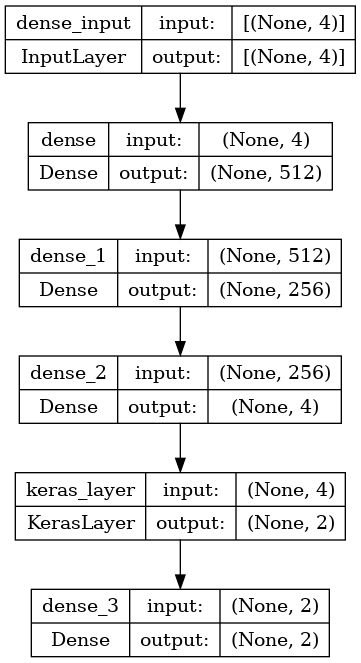

In [43]:
tf.keras.utils.plot_model(model, to_file = 'model_architecture1.png', show_shapes=True, show_layer_names = True)

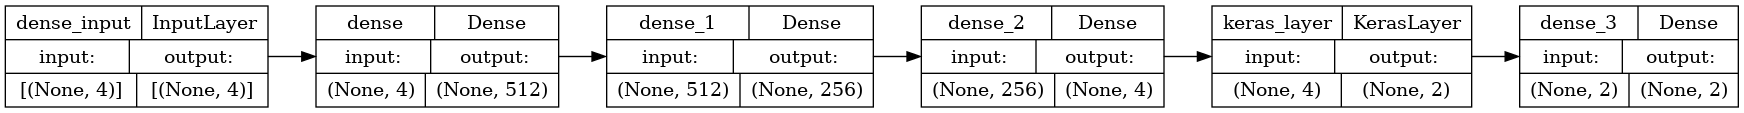

In [44]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, to_file = 'model_architecture2.png', show_shapes=True, rankdir="LR")

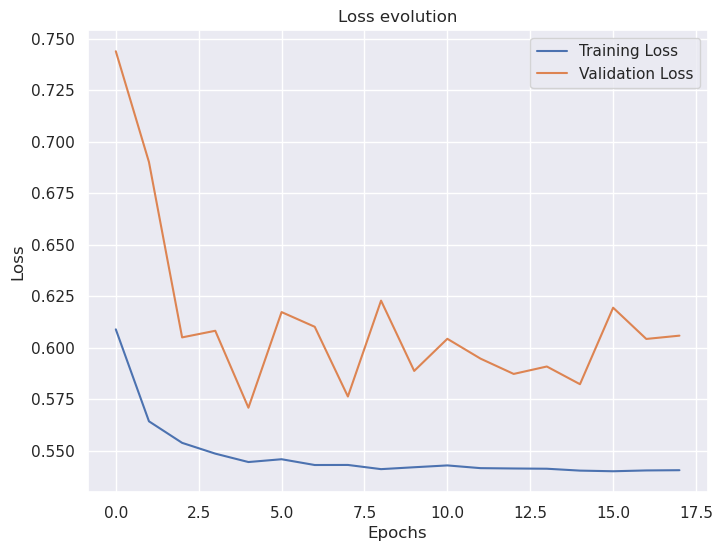

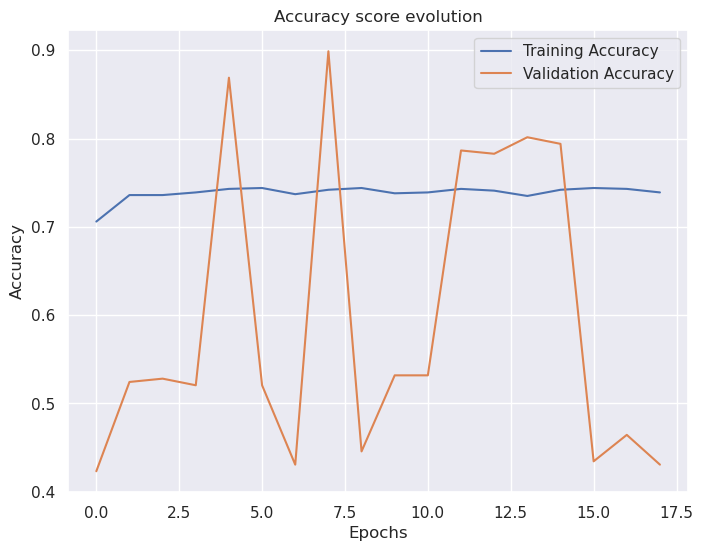

In [45]:
# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import wordcloud

# Miscellaneous
from tqdm import tqdm
import os
import random
from IPython import display

def plot_learning_evolution(r):
    plt.figure(figsize=(8, 6))
    
    #plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Training Loss')
    plt.plot(r.history['val_loss'], label='Validation Loss')
    plt.title('Loss evolution')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('loss.png')
    
    plt.figure(figsize=(8, 6))
    #plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='Training Accuracy')
    plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy score evolution')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.savefig('accuracy.png')
    
plot_learning_evolution(history)

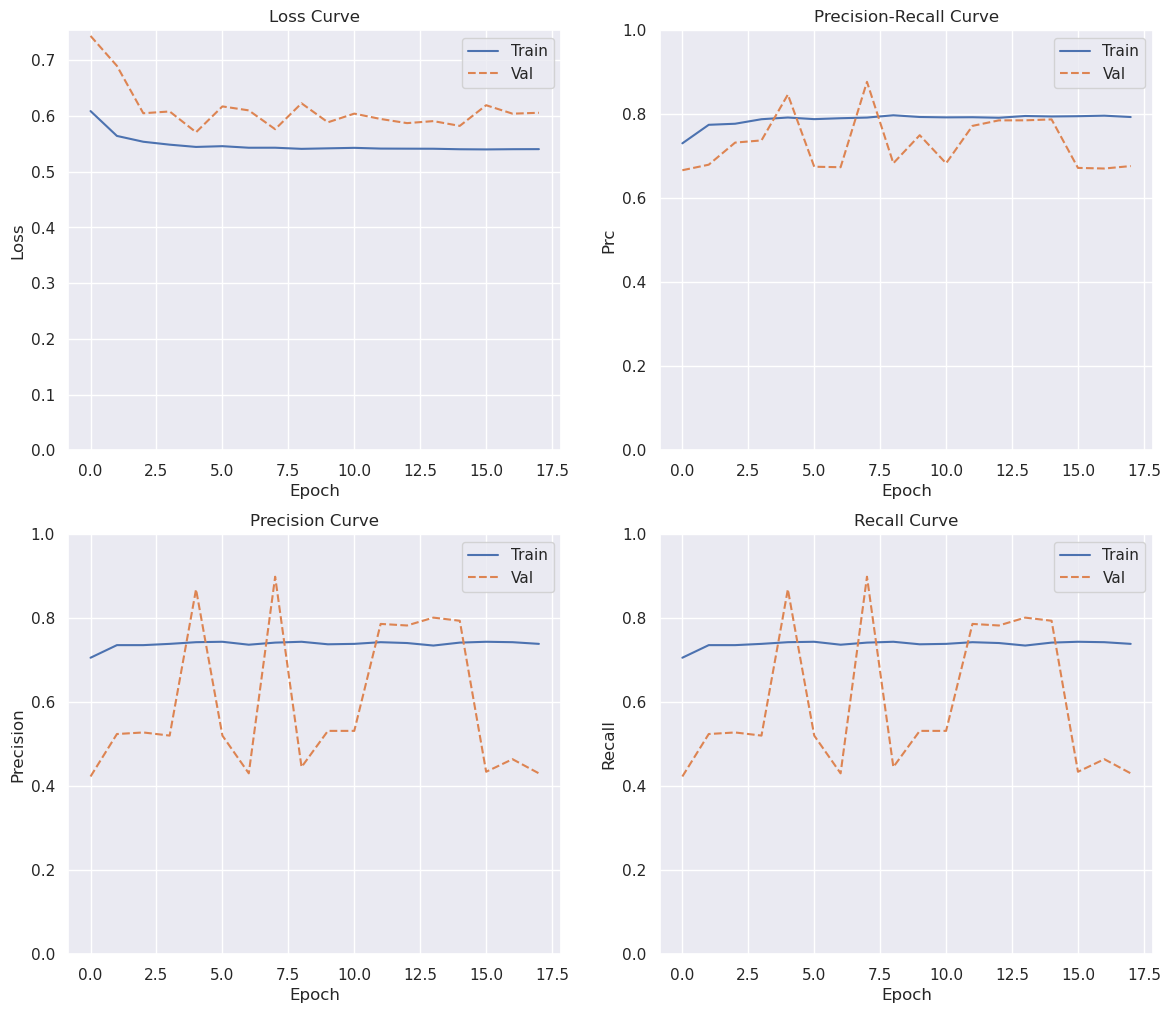

In [46]:
mpl.rcParams['figure.figsize'] = (14, 12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    titles = ['Loss Curve','Precision-Recall Curve','Precision Curve','Recall Curve']
    for (n, metric),title in zip(enumerate(metrics),titles):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
              plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
              plt.ylim([0.8,1])
        else:
              plt.ylim([0,1])
        
        plt.title(title)
        plt.legend()
        plt.savefig('loss_prc_recall.png')
        
        
plot_metrics(history)

In [47]:
model.evaluate(testX, testy)
model.evaluate(trainX, trainy)
predy = model.predict(testX)

9/9 [==============================] - 11s 1s/step


In [48]:
train_labels_pred=np.argmax(model.predict(trainX), axis=1)
train_labels_real=np.argmax(trainy, axis=1)
rounded_labels_pred=np.argmax(predy, axis=1)
rounded_labels_real=np.argmax(testy, axis=1)

32/32 [==============================] - 40s 1s/step


In [49]:
labels = ['No Backorder','Backorder']
from sklearn.metrics import classification_report
print(classification_report(rounded_labels_real, rounded_labels_pred, target_names=labels))

              precision    recall  f1-score   support

No Backorder       0.88      1.00      0.94       200
   Backorder       1.00      0.60      0.75        67

    accuracy                           0.90       267
   macro avg       0.94      0.80      0.84       267
weighted avg       0.91      0.90      0.89       267



In [50]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(rounded_labels_real, rounded_labels_pred, target_names=labels))

                    pre       rec       spe        f1       geo       iba       sup

No Backorder       0.88      1.00      0.60      0.94      0.77      0.62       200
   Backorder       1.00      0.60      1.00      0.75      0.77      0.57        67

 avg / total       0.91      0.90      0.70      0.89      0.77      0.61       267



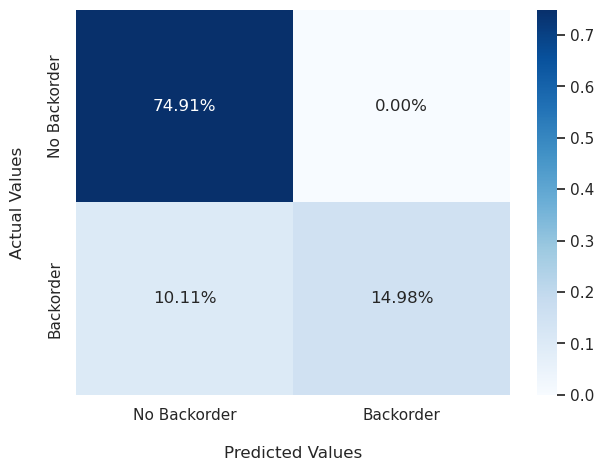

No Backorders Detected (True Negatives):  200
No Backorders Incorrectly Detected (False Positives):  0
Backorders Missed (False Negatives):  27
Backorders Detected (True Positives):  40
Total Backorders:  67


In [51]:
from sklearn.metrics import *
cm = confusion_matrix(rounded_labels_real, rounded_labels_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.savefig('cm.png')
plt.show()

print('No Backorders Detected (True Negatives): ', cm[0][0])
print('No Backorders Incorrectly Detected (False Positives): ', cm[0][1])
print('Backorders Missed (False Negatives): ', cm[1][0])
print('Backorders Detected (True Positives): ', cm[1][1])
print('Total Backorders: ', np.sum(cm[1]))

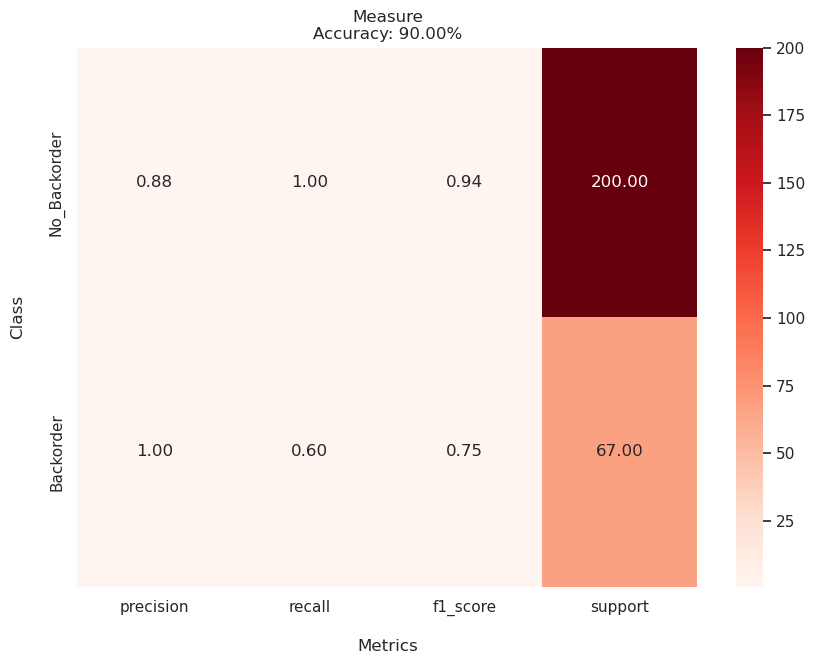

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def plot_classification_report(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[1:-3]:
        row = {}
        row_data = line.split()
        row_data = list(filter(None, row_data))
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    df = pd.DataFrame.from_dict(report_data)
    df.set_index('class', inplace=True)
    heatmap = sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
    heatmap.set_xlabel('\nMetrics')
    heatmap.set_ylabel('Class\n')
    heatmap.set_title('Classification Report')


def accuracy_score(report):
    report_data = []
    lines = report.split('\n')
    lines = list(filter(None, lines))
    for line in lines[3:-2]:
        row_data = line.split()
        row_data = list(filter(None, row_data))
        return float(row_data[1])


labels = ['No_Backorder','Backorder']

report = classification_report(rounded_labels_real, rounded_labels_pred, target_names=labels)
plt.figure(figsize=(10,7))
plot_classification_report(report)
accuracy = accuracy_score(report)


plt.title('Measure\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.savefig('classification_reports.png')
plt.show()


In [53]:
import sklearn
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    auc = sklearn.metrics.auc(fp, tp)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.7, 0.7), xytext=(0.6, 0.5),
            arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )   
    plt.plot(fp, tp, label='{0}, AUC_test: {1:.4f}'.format(name, auc), linewidth=2, **kwargs)
    plt.xlabel('False positives', fontsize=16)
    plt.ylabel('True positives', fontsize=16)
    #plt.xlim([-0.5,20])
    #plt.ylim([80,100.5])
    plt.grid(True)
    #ax = plt.gca()
    #ax.set_aspect('equal')

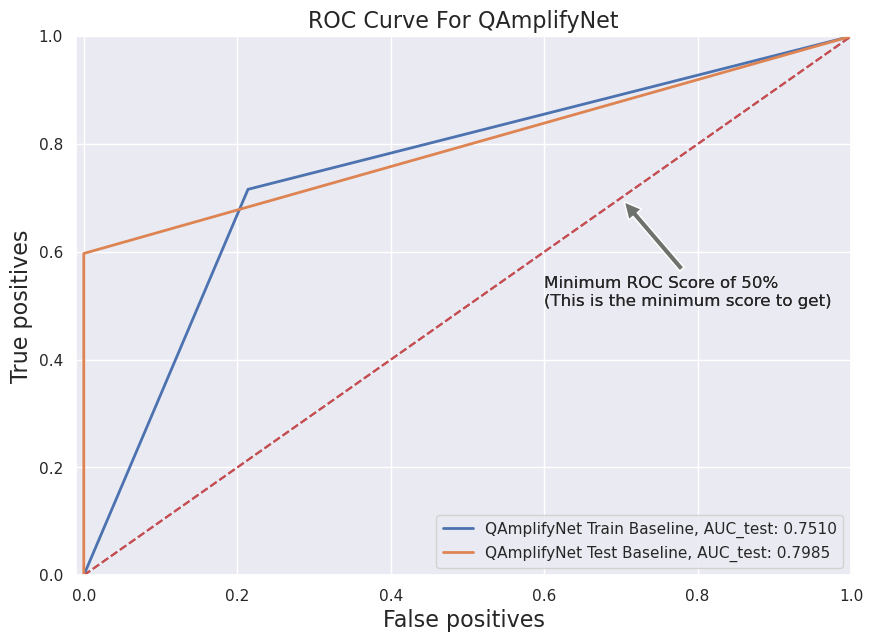

In [54]:
plt.figure(figsize=(10,7))
plot_roc("QAmplifyNet Train Baseline", train_labels_real, train_labels_pred, color=colors[0])
plot_roc("QAmplifyNet Test Baseline", rounded_labels_real, rounded_labels_pred, color=colors[1], linestyle='-')
plt.title("ROC Curve For QAmplifyNet", fontsize=16)
plt.axis([-0.01,1,0,1])
plt.legend(loc='lower right');
plt.savefig('ROC_curve.png')

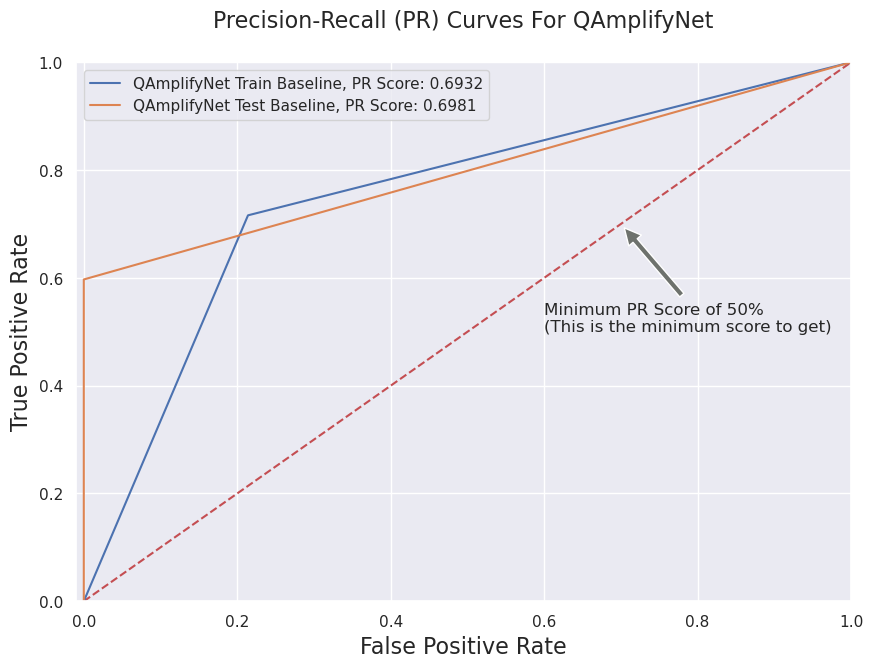

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'r--')
plt.annotate('Minimum PR Score of 50%\n(This is the minimum score to get)', xy=(0.7, 0.7), xytext=(0.6, 0.5),
            arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )   

precision2, recall2, _ = sklearn.metrics.roc_curve(train_labels_real, train_labels_pred)
score2 = sklearn.metrics.average_precision_score(train_labels_real, train_labels_pred)
plt.plot(precision2, recall2, label='QAmplifyNet Train Baseline, PR Score: {0:.4f}'.format(score2))

precision, recall, _ = sklearn.metrics.roc_curve(rounded_labels_real, rounded_labels_pred)
score = sklearn.metrics.average_precision_score(rounded_labels_real, rounded_labels_pred)
plt.plot(precision, recall, label='QAmplifyNet Test Baseline, PR Score: {0:.4f}'.format(score))

plt.legend()
    
 
plt.title('Precision-Recall (PR) Curves For QAmplifyNet\n', fontsize=16) # Add title to main plot
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.axis([-0.01,1,0,1])
# Save the figure to a file
plt.savefig('PR_curve.png')
plt.show()

157/157 [==============================] - 202s 1s/step


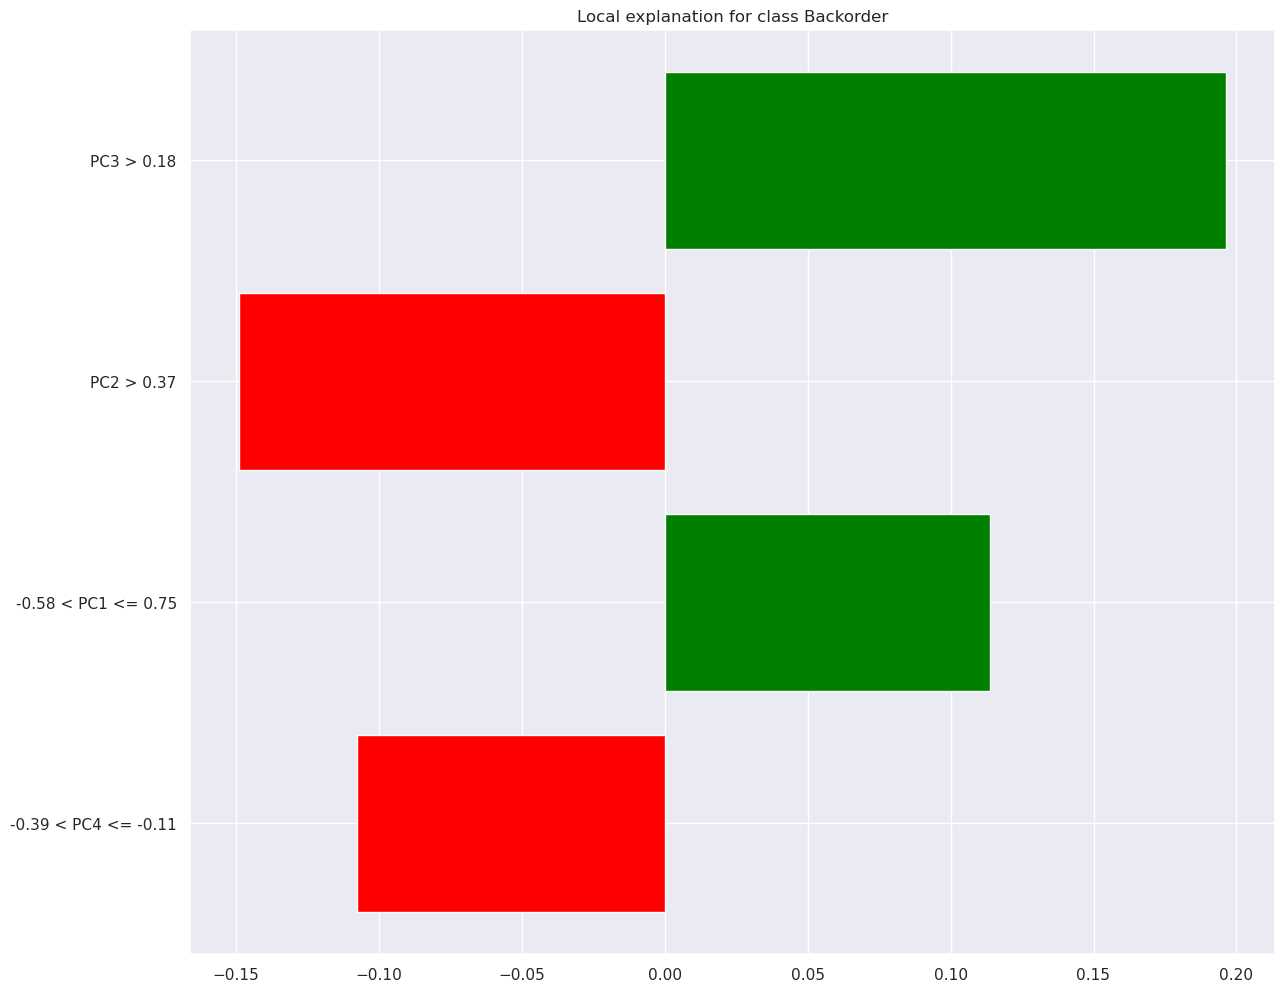

In [56]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(trainX), mode="classification", feature_names=['PC1','PC2','PC3','PC4'], class_names=["No Backorder", "Backorder"])
instance_idx = 0  # Choose the index of the instance you want to explain
# Modify the following line to get predicted probabilities using the predict method
predict_fn = lambda x: model.predict(x)

explanation = explainer.explain_instance(testX[instance_idx], predict_fn, num_features=len(['PC1','PC2','PC3','PC4']))
explanation_fig = explanation.as_pyplot_figure()
explanation_fig.savefig("lime_explanation.png")


In [64]:
from lime import lime_tabular
import matplotlib.pyplot as plt

# Set the figure size and fontsize
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(trainX), mode="classification", feature_names=['PC1','PC2','PC3','PC4'], class_names=["No Backorder", "Backorder"])
instance_idx = 1 # Choose the index of the instance you want to explain

# Modify the following line to get predicted probabilities using the predict method
predict_fn = lambda x: model.predict(x)

# Explanation using LIME
explanation = explainer.explain_instance(testX[instance_idx], predict_fn, num_features=len(['PC1','PC2','PC3','PC4']))

# Feature Importance Bar Plot
explanation.show_in_notebook(show_table=True)

157/157 [==============================] - 207s 1s/step


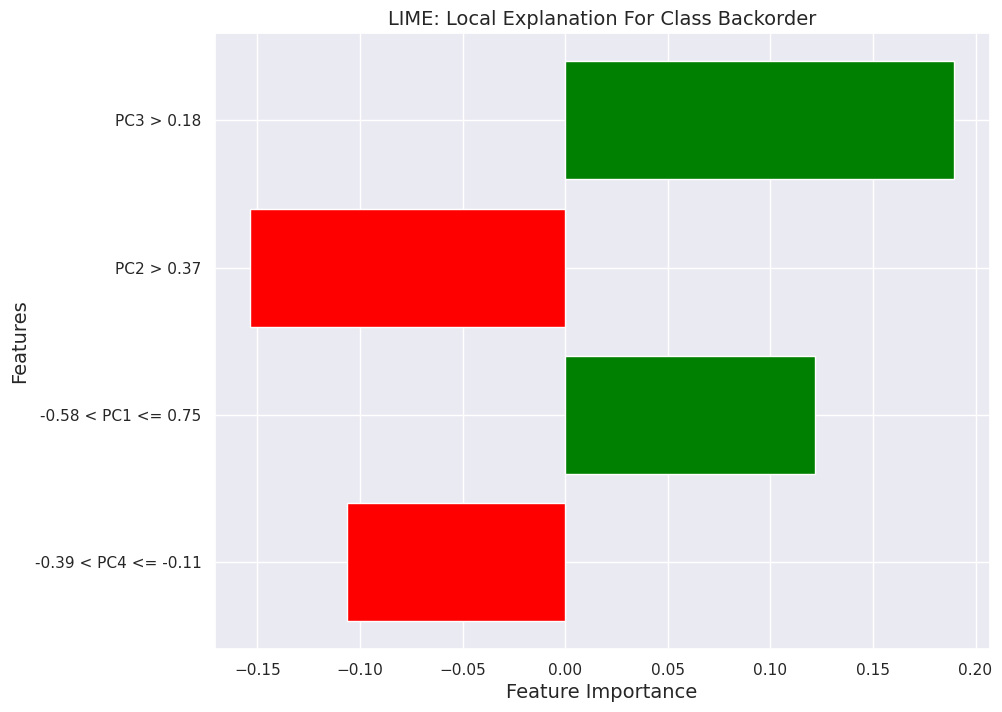

In [75]:
explanation_fig = explanation.as_pyplot_figure()
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('LIME: Local Explanation For Class Backorder', fontsize=14)
explanation_fig.savefig("lime_explanation.png", dpi=300)

In [79]:
import shap

# https://www.kirenz.com/post/2022-06-17-explainable-ai-with-tensorflow-keras-and-shap/
shap.initjs()
# Convert the input data to the correct format
input_data = np.array([rounded_labels_real]).astype(int)

# Create an explainer object using SHAP
explainer = shap.KernelExplainer(model, trainX[:50,:])

# Calculate SHAP values for the input data
shap_values = explainer.shap_values(trainX[20,:], nsamples=500)

# Visualize the SHAP values for a single prediction
shap.force_plot(explainer.expected_value[0], shap_values[0], trainX[20,:])

In [80]:
# Create an explainer object using SHAP
explainer = shap.KernelExplainer(model, trainX[:50,:])

# Calculate SHAP values for the input data
shap_values = explainer.shap_values(testX[20,:], nsamples=500)

# Visualize the SHAP values for a single prediction
shap.force_plot(explainer.expected_value[0], shap_values[0], testX[20,:])

In [60]:
expected_value = explainer.expected_value

select = range(50)
features = trainX[:50]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)

  0%|          | 0/50 [00:00<?, ?it/s]

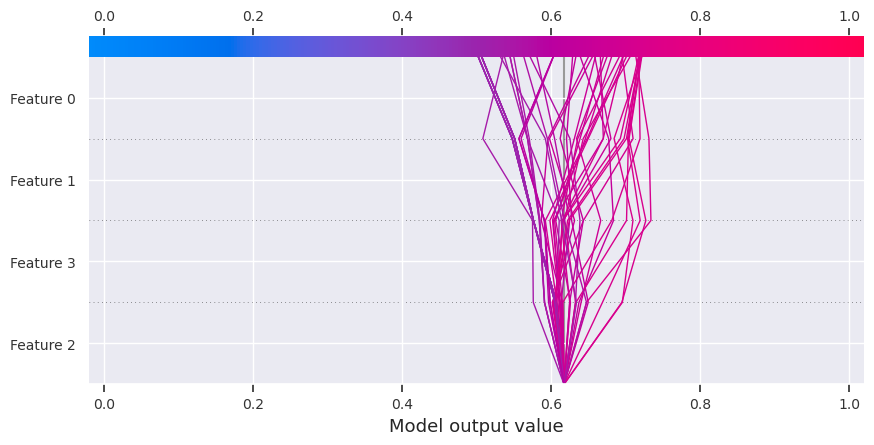

In [61]:
y_pred = (np.sum(shap_values,axis=1) + expected_value[0]) > 0
misclassified = y_pred != trainX[:50]
summary_plot = shap.decision_plot(expected_value[0], shap_values[misclassified], features[misclassified],
                   link='logit', show=False)

plt.gcf().set_size_inches(10, 6) # set the figure size
plt.gcf().subplots_adjust(bottom=0.3)  # adjust the bottom margin
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=10)  # adjust the font size
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=10)

plt.show()